In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset using the provided path
df = pd.read_csv('/content/drive/MyDrive/Week2/Datasets/diabetes.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Perform EDA:
# 1. Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# 2. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# 3. Summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())


First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data types of each column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handle missing data
# 1. Dropping rows with missing values
df_dropped = df.dropna()  # Drops any row with missing values

# 2. Imputing missing values (for numerical columns, using the mean or median)
# For numerical columns:
df_imputed = df.fillna(df.mean())  # Impute missing values with the mean for numerical columns

# Alternatively, you can choose the median if the data is skewed
# df_imputed = df.fillna(df.median())  # Impute missing values with the median for numerical columns

# For categorical columns, you can use the mode to fill missing values
# df_imputed['column_name'] = df['column_name'].fillna(df['column_name'].mode()[0])

# Display results
print("\nDataset after dropping rows with missing values:")
print(df_dropped.head())

print("\nDataset after imputing missing values with the mean:")
print(df_imputed.head())


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dataset after dropping rows with missing values:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167

In [4]:
# Separate the feature matrix (X) and target variable (y)
# Assuming the target column is named 'Outcome' (common for diabetes dataset)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Perform the train-test split manually (70% - 30%)
# Shuffle the data
shuffled_indices = np.random.permutation(len(df))
train_size = int(0.7 * len(df))  # 70% for training

# Split the data into train and test sets
train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Display the split sizes
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))


Train set size: 537
Test set size: 231


In [16]:
import numpy as np
import pandas as pd

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to predict the class for a single query
def predict_single(X_train, y_train, x_query, k):
    distances = []

    # Calculate distance from x_query to all points in X_train
    for i in range(len(X_train)):
        dist = euclidean_distance(x_query, X_train.iloc[i])
        distances.append((dist, i))  # Store distance with corresponding index

    # Sort distances and get the indices of the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest_indices = [distances[i][1] for i in range(k)]

    # Get the labels of the k nearest neighbors
    k_nearest_labels = y_train.iloc[k_nearest_indices]

    # Return the most common label (majority vote)
    return k_nearest_labels.mode()[0]

# Function to predict the classes for all test samples
def predict(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(len(X_test)):
        x_query = X_test.iloc[i]
        y_pred.append(predict_single(X_train, y_train, x_query, k))
    return np.array(y_pred)

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Example of how to use the KNN algorithm
def knn_algorithm(X_train, y_train, X_test, y_test, k):
    # Predict classes for all test samples
    y_pred = predict(X_train, y_train, X_test, k)

    # Evaluate accuracy
    acc = accuracy(y_test, y_pred)
    return acc

# Assuming X_train, y_train, X_test, y_test are already defined
# Example usage
k = 3  # Number of nearest neighbors
# Assuming you have preprocessed X_train, y_train, X_test, and y_test
# Use your actual data to replace this placeholder
accuracy_score = knn_algorithm(X_train, y_train, X_test, y_test, k)

print(f"Accuracy: {accuracy_score * 100:.2f}%")


Accuracy: 68.83%


In [17]:
import numpy as np
import pandas as pd

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to predict the class for a single query
def predict_single(X_train, y_train, x_query, k):
    distances = []

    # Calculate distance from x_query to all points in X_train
    for i in range(len(X_train)):
        dist = euclidean_distance(x_query, X_train.iloc[i])
        distances.append((dist, i))  # Store distance with corresponding index

    # Sort distances and get the indices of the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest_indices = [distances[i][1] for i in range(k)]

    # Get the labels of the k nearest neighbors
    k_nearest_labels = y_train.iloc[k_nearest_indices]

    # Return the most common label (majority vote)
    return k_nearest_labels.mode()[0]

# Function to predict the classes for all test samples
def predict(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(len(X_test)):
        x_query = X_test.iloc[i]
        y_pred.append(predict_single(X_train, y_train, x_query, k))
    return np.array(y_pred)

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Manual Min-Max Scaling
def min_max_scaling(X):
    # Apply Min-Max scaling to each feature (column)
    X_scaled = X.copy()
    for column in X.columns:
        min_val = X[column].min()
        max_val = X[column].max()
        X_scaled[column] = (X[column] - min_val) / (max_val - min_val)
    return X_scaled

# Function to perform KNN algorithm and experiment with scaling
def knn_algorithm(X_train, y_train, X_test, y_test, k, scale=False):
    # Scale the data manually if required
    if scale:
        X_train_scaled = min_max_scaling(X_train)
        X_test_scaled = min_max_scaling(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test

    # Predict classes for all test samples using the scaled data
    y_pred = predict(X_train_scaled, y_train, X_test_scaled, k)

    # Evaluate accuracy
    acc = accuracy(y_test, y_pred)
    return acc

# Example usage
k = 3  # Number of nearest neighbors

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed
# Without scaling
accuracy_no_scale = knn_algorithm(X_train, y_train, X_test, y_test, k, scale=False)
print(f"Accuracy without scaling: {accuracy_no_scale * 100:.2f}%")

# With scaling
accuracy_with_scale = knn_algorithm(X_train, y_train, X_test, y_test, k, scale=True)
print(f"Accuracy with scaling: {accuracy_with_scale * 100:.2f}%")


Accuracy without scaling: 68.83%
Accuracy with scaling: 74.03%


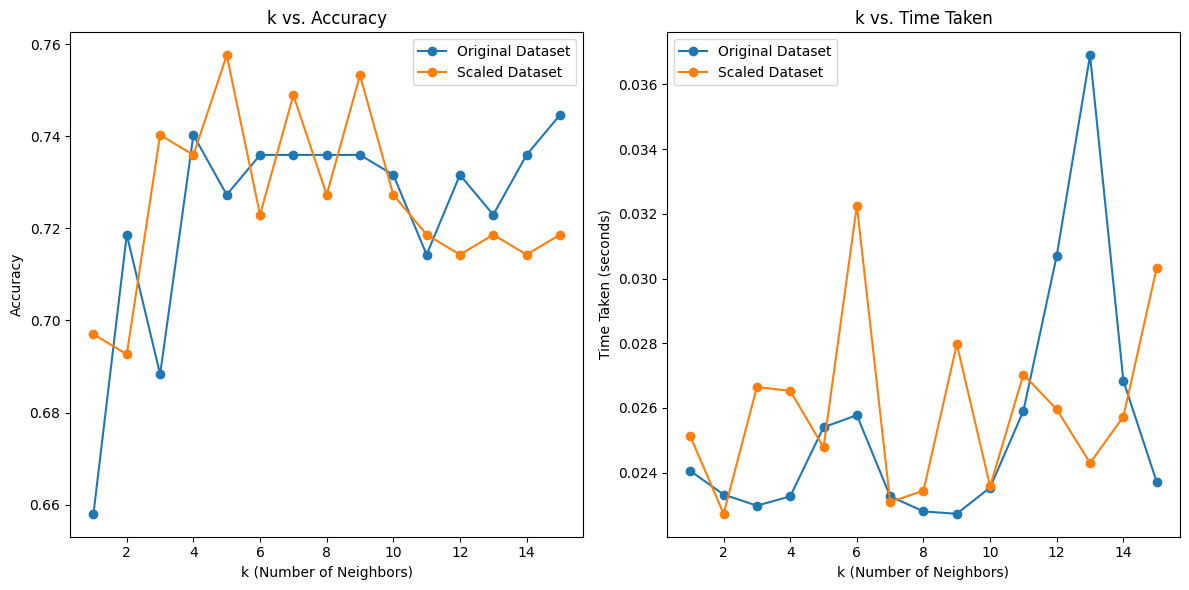

In [20]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Function to scale the feature matrix using Min-Max Scaling
def min_max_scaling(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

# Function to run KNN experiment and vary k
def knn_experiment_sklearn(X_train, y_train, X_test, y_test, k_range, scale=False):
    accuracies = []
    times = []

    # Scale data if required
    if scale:
        X_train = min_max_scaling(X_train)
        X_test = min_max_scaling(X_test)

    for k in k_range:
        start_time = time.time()  # Start timing

        # Initialize KNeighborsClassifier from sklearn
        knn = KNeighborsClassifier(n_neighbors=k)

        # Fit the model
        knn.fit(X_train, y_train)

        # Predict the labels on the test set
        y_pred = knn.predict(X_test)

        # Record accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        # Record time taken
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)

    return accuracies, times

# Example usage with k=1 to k=15
k_range = list(range(1, 16))

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed

# Run experiment without scaling
accuracy_no_scale, time_no_scale = knn_experiment_sklearn(X_train, y_train, X_test, y_test, k_range, scale=False)

# Run experiment with scaling
accuracy_with_scale, time_with_scale = knn_experiment_sklearn(X_train, y_train, X_test, y_test, k_range, scale=True)

# Plot Results
plt.figure(figsize=(12, 6))

# k vs Accuracy
plt.subplot(1, 2, 1)
plt.plot(k_range, accuracy_no_scale, label='Original Dataset', marker='o')
plt.plot(k_range, accuracy_with_scale, label='Scaled Dataset', marker='o')
plt.title("k vs. Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()

# k vs Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_range, time_no_scale, label='Original Dataset', marker='o')
plt.plot(k_range, time_with_scale, label='Scaled Dataset', marker='o')
plt.title("k vs. Time Taken")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.legend()

plt.tight_layout()
plt.show()
